In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline 
#https://stackoverflow.com/a/43028034

In [4]:
df = pd.read_csv("FuelConsumption.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
cdf = df[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
cdf.head()

,CYLINDERS,ENGINESIZE,CO2EMISSIONS,FUELCONSUMPTION_COMB
0,4,2.0,196,8.5
1,4,2.4,221,9.6
2,4,1.5,136,5.9
3,6,3.5,255,11.1
4,6,3.5,244,10.6


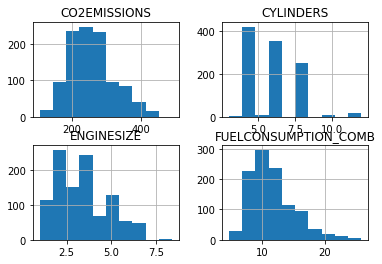

In [7]:
cdf.hist()
plt.show()

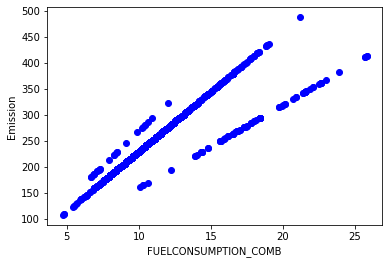

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

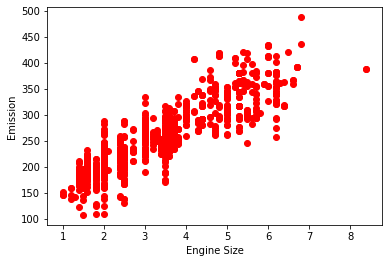

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='red')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

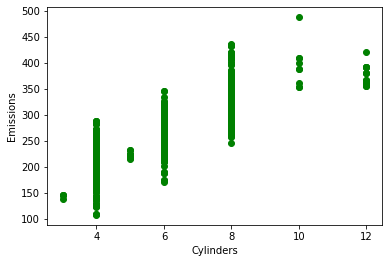

In [12]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='green')
plt.xlabel('Cylinders')
plt.ylabel('Emissions')
plt.show()

In [36]:
# Created a an array of True and False values of the same length as the dataset and used it as a mask to split data into train and test
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

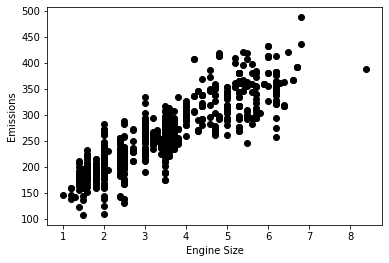

In [37]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='black')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

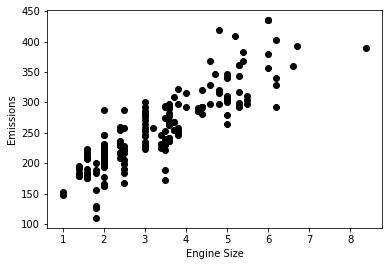

In [38]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='black')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

In [53]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

print('Coefficients', regr.coef_)
print('Intercept', regr.intercept_)

Coefficients [[39.32399808]]
Intercept [124.52750393]


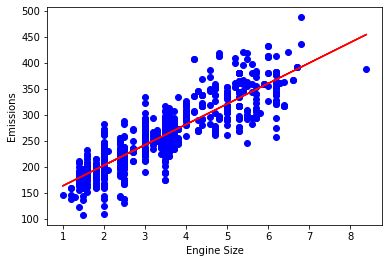

In [54]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')

## Evaluation

In [56]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print('Mean absolute error: %.2f' % np.mean(np.absolute(test_y - test_y_)))
print('Residual sum of squares (MSE): %.2f' % np.mean((test_y - test_y_)**2))
print('R2-score: %.2f' % r2_score(test_y_, test_y))

Mean absolute error: 23.08
Residual sum of squares (MSE): 927.74
R2-score: 0.69
